# Bayesian inference for a coin flip example

We aim to estimate the probability of people wearing glasses $\theta$. We are given a binary vector which, for `N` randomly selected people, indicates whether they wear glasses (`1`) or not (`0`). For example:

Observations = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Upfront, we assume that the probability of people wearing glasses ($\theta$) is uniformly distributed in [0, 1]. We model this uniform distribution as a Beta distribution $B(\alpha, \beta)$.

Task 1: What values of $\alpha$ and $\beta$ make the Beta distribution uniform in [0, 1]? Implement the distribution (using, e.g. `pytorch.distributions`) and  plot its density in [0, 1].

Given $\theta$, the number of people who wear glasses in a population is a Binomial distribution (in other words, the likelihood is a Binomial distribution). Since the Beta distribution is the conjugate prior to the Binomial distribution, we can update the posterior in closed-form, and the posterior will be a Beta distribution with updated values for $\alpha$ and $\beta$. Assuming that `x` out of the `N` observed people wore glasses, the update is:

$$
p(\theta | x) = B(\alpha + x, \beta - x + N)
$$

Task 2: Implement the update rule for $\alpha$ and $\beta$.

Task 3: Visualize the posterior distribution for given the uniform prior in [0, 1] and having observed a single person that wears glasses.

Task 4: Use the posterior distribution obtained in Task 3 as prior and perform a new update, assuming that a second person has also worn glasses. Visualize the posterior.

Task 5: Repeat the procedure from Task 4 for all 10 observations defined above.

Task 6: Instead of updating the posterior "one step at a time" as done in Tasks 3-6, you can also perform the update "at once" (two out of 10 people wear glasses) with the update rule implemented in Task 2. Perform the update given all observations in one step and compare your result to Task 5.

In [103]:
import matplotlib.pyplot as plt

import torch
from torch import tensor
from torch.distributions import Beta

In [100]:
observations = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [101]:
def update(alpha, beta, x, n):
    return alpha + x, beta - x + n

### Multistep update

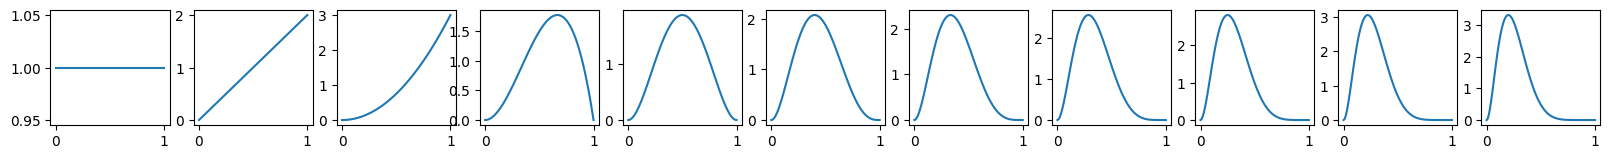

In [99]:
# Prior.
alpha = tensor([1.0])
beta = tensor([1.0])

# Evaluate Prior.
prior = Beta(alpha, beta)
prob = prior.log_prob(p).exp()

fig, ax = plt.subplots(1, len(observations) + 1, figsize=(20, 1.5))
_ = ax[0].plot(p, prob)

for i, obs in enumerate(observations):
    alpha, beta = update(alpha, beta, obs, 1)
    posterior = Beta(alpha, beta)
    prob = posterior.log_prob(p).exp()
    _ = ax[i+1].plot(p, prob)

### One step update

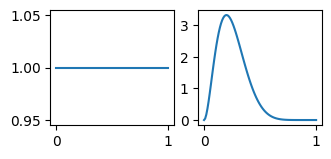

In [102]:
# Prior.
alpha = tensor([1.0])
beta = tensor([1.0])

# Evaluate Prior.
prior = Beta(alpha, beta)
prob = prior.log_prob(p).exp()

fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5))
_ = ax[0].plot(p, prob)

alpha, beta = update(alpha, beta, sum(observations), len(observations))
posterior = Beta(alpha, beta)
prob = posterior.log_prob(p).exp()
_ = ax[1].plot(p, prob)